In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import scipy
# import sklearn
# import tensorflow as tf
# import keras
# import nltk
# import statsmodels.api as sm



In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

from colorama import Style, Fore

In [4]:
file = pd.read_csv("Passanger_booking_data.csv")
file.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
5,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
6,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
8,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
9,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0


In [5]:
file.shape

(50002, 14)

In [6]:
file.describe(include='all')


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002,50002,50002.000000,50002.000000,50002.000000,50002,50002,50002,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44383,49498,NaN,NaN,NaN,8102,2680,17873,NaN,NaN,NaN,NaN,NaN
mean,1.591256,NaN,NaN,84.940582,23.044778,9.066277,NaN,NaN,NaN,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,NaN,NaN,90.450548,33.887171,5.412569,NaN,NaN,NaN,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.000000,9.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.000000,13.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


In [7]:
file.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [8]:
file.duplicated().sum()

719

In [9]:
file = file.drop_duplicates()

In [10]:
file.shape

(49283, 14)

In [11]:
all_columns = file.columns
for column in all_columns:
    
    if file[column].dtypes=='object':
        print(f"{column}\n{file[column].unique()}")
        print('\n')



sales_channel
['Internet' 'Mobile']


trip_type
['RoundTrip' 'CircleTrip' 'OneWay']


flight_day
['Tue' 'Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Fri']


route
['AKLHGH' 'AKLDEL' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPER' 'CEBSYD' 'CGKCKG' 'CGKCTS' 'CGKCTU' 'C

In [12]:
for column in all_columns:
    if file[column].dtypes=='object':
        value_counts = file[column].value_counts()
        max_value = value_counts.idxmax()
        print(f"Maximum occured value from {column} is {max_value}.")

Maximum occured value from sales_channel is Internet.
Maximum occured value from trip_type is RoundTrip.
Maximum occured value from flight_day is Mon.
Maximum occured value from route is AKLKUL.
Maximum occured value from booking_origin is Australia.


In [13]:
queried_data = file.query("(trip_type == 'RoundTrip' or trip_type =='CircleTrip') and length_of_stay >=10")


In [14]:
queried_data["length_of_stay"].max()

778

In [15]:
queried_data.query("length_of_stay == 778")

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
10823,1,Internet,RoundTrip,102,778,8,Wed,DPSMEL,Australia,0,0,0,8.83,1


In [16]:
def plot_pie_chart(column_list):
    fig, axs = plt.subplots(1, len(column_list), figsize=(20, 4))

    for i, column in enumerate(column_list):
        value_counts = file[column].value_counts()
        axs[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
        axs[i].set_title(column)

    plt.tight_layout()
    plt.show()

In [17]:
column_list =[['sales_channel','trip_type','flight_day'],['wants_in_flight_meals','wants_preferred_seat','wants_extra_baggage','booking_complete']]


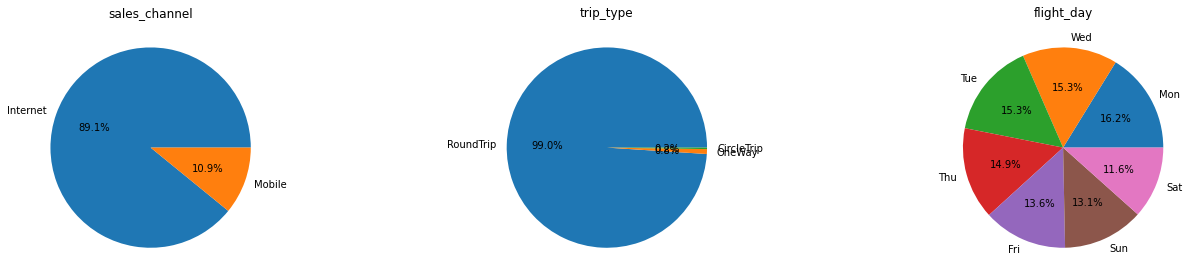

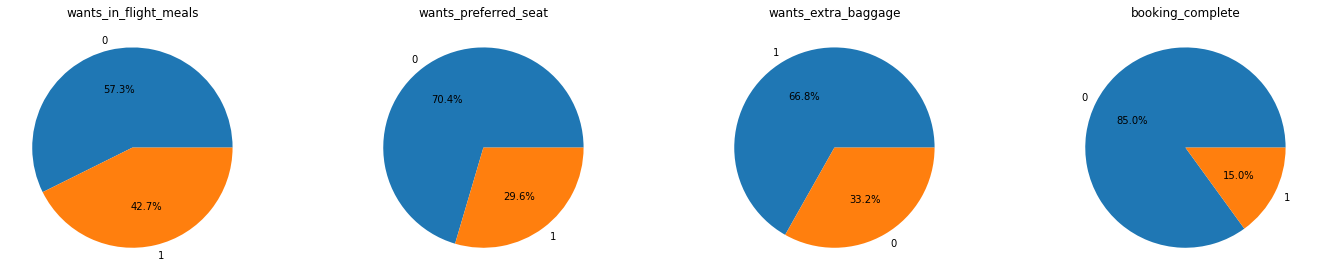

In [18]:
for col in column_list:
    print('\n')
    plot_pie_chart(col)

In [43]:
def remove_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

In [ ]:
for column in file_1.columns.to_list()[9:]:
    file_1[column] = remove_outliers_iqr(file_1[column])

/tmp/ipykernel_7698/1988140712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queried_data['flight_duration']=queried_data['flight_duration'].round()


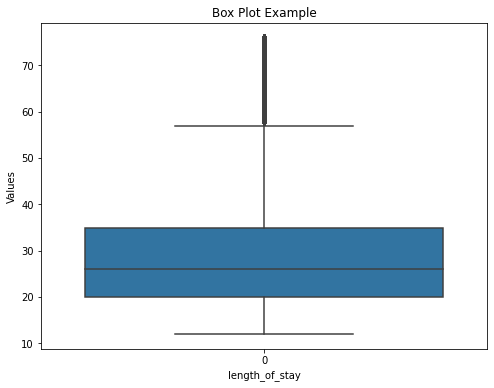

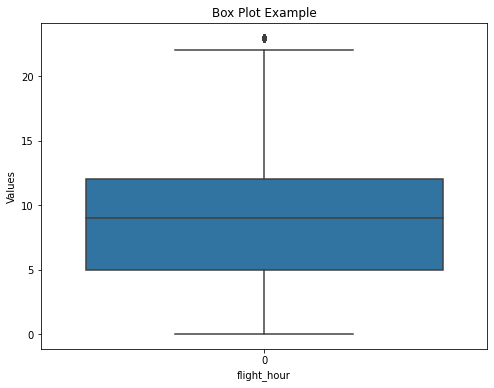

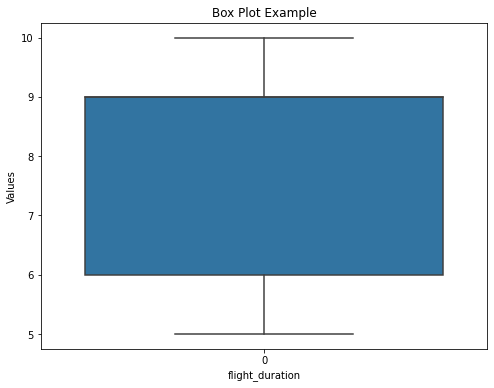

In [65]:
list_columns =['length_of_stay','flight_hour','flight_duration']
query_data = file
queried_data['flight_duration']=queried_data['flight_duration'].round()
for colu in list_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=queried_data[colu])

    # Set plot title and labels
    plt.title('Box Plot Example')
    plt.xlabel(f'{colu}')
    plt.ylabel('Values')


In [55]:
file['length_of_stay']= remove_outliers_iqr(file['length_of_stay'])

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12.0,6,Tue,AKLHGH,Australia,0,0,0,7.21,1


In [63]:
file['flight_hour']=file['flight_hour'].round()


In [64]:
file.head(1)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12.0,6,Tue,AKLHGH,Australia,0,0,0,7.21,1


In [67]:
import pandas as pd

# Example DataFrame

# Perform frequency encoding
frequency_map = file['route'].value_counts(normalize=True).to_dict()
file['route_Frequency_Encoded'] = file['route'].map(frequency_map)

# Display the encoded DataFrame


In [71]:
file=file.drop(['route'], axis=1)

In [72]:
file.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_Frequency_Encoded
0,1,Internet,RoundTrip,21,12.0,6,Tue,Australia,0,0,0,7.21,1,0.000041
1,2,Internet,RoundTrip,262,19.0,7,Sat,New Zealand,1,0,0,5.52,0,0.000406
2,1,Internet,RoundTrip,112,20.0,3,Sat,New Zealand,0,0,0,5.52,0,0.000406
3,2,Internet,RoundTrip,243,22.0,17,Wed,India,1,1,0,5.52,0,0.000406
4,1,Internet,RoundTrip,96,31.0,4,Sat,New Zealand,0,0,1,5.52,0,0.000406


In [73]:
file = pd.get_dummies(file, columns = ['sales_channel','trip_type','flight_day','booking_origin'], drop_first = True)

In [76]:
file=file.drop(['purchase_lead'], axis=1)


In [117]:
X = file.drop('booking_complete', axis = 1)
y = file['booking_complete']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size =0.2, random_state = 42)


In [118]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()


In [119]:
num_cols = ['num_passengers', 'length_of_stay', 'flight_hour', 'flight_duration']
file[num_cols] = scaler.fit_transform(file[num_cols])

/tmp/ipykernel_7698/1977057853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file[num_cols] = scaler.fit_transform(file[num_cols])


In [125]:
def train_classifier(model, x_train, y_train, x_val, y_val, name = "model"):
#     print(f'{blk} For {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    score = accuracy_score(y_val, y_pred)

    print(f'Accuracy is {score}')
#     print(f'{blk}')
    print('*'*40)

In [126]:
models = {
    'LogisticRegression':LogisticRegression(),
    'Balanced-RFC': BalancedRandomForestClassifier(random_state = 42),
    'RFC':RandomForestClassifier(),
    'CatBoost': CatBoostClassifier(verbose = False, random_state = 42),
    'Light GBM':LGBMClassifier(),
    'XGBoost':XGBClassifier(random_state = 42),
    'Hist-Gradient':HistGradientBoostingClassifier()
}

In [127]:
file =file.dropna()

In [128]:
file.isna().sum()

num_passengers                         0
length_of_stay                         0
flight_hour                            0
wants_extra_baggage                    0
wants_preferred_seat                   0
                                      ..
booking_origin_United Arab Emirates    0
booking_origin_United Kingdom          0
booking_origin_United States           0
booking_origin_Vanuatu                 0
booking_origin_Vietnam                 0
Length: 121, dtype: int64

In [129]:
for i in range(len(models)):
    model = list(models.values())[i]
    print(f'{model}')
    name = list(models.keys())[i]
    train_classifier(model, X_train, y_train, X_val, y_val, name = name)

LogisticRegression()


/home/abhinandan/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/abhinandan/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/abhinandan/.local/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` wil

Accuracy is 0.8480099222009245
****************************************
BalancedRandomForestClassifier(random_state=42)
Accuracy is 0.6784304882173864
****************************************
RandomForestClassifier()
Accuracy is 0.8400045100913294
****************************************
Accuracy is 0.8497012064494306
****************************************
LGBMClassifier()
Accuracy is 0.8497012064494306
****************************************
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None